In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2

import os
print(os.listdir("../input"))

['alzheimers-dataset-4-class-of-images']


In [21]:
images = []
labels = [] 
for dir_path in glob.glob("../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented/"):
    label = "MildDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)

In [22]:
for dir_path in glob.glob("../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/"):
    label = "VeryMildDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)

In [23]:
for dir_path in glob.glob("../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented/"):
    label = "ModerateDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)

In [24]:
for dir_path in glob.glob("../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/"):
    label = "NonDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

In [25]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [26]:
id_to_label_dict

{0: 'MildDemented',
 1: 'ModerateDemented',
 2: 'NonDemented',
 3: 'VeryMildDemented'}

In [27]:
label_ids = np.array([label_to_id_dict[x] for x in labels])

In [28]:
images.shape, label_ids.shape, labels.shape

((5121, 45, 45, 3), (5121,), (5121,))

In [29]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(images,label_ids, test_size = 0.20)

In [30]:
y_train

array([2, 2, 2, ..., 3, 2, 3])

In [31]:
#Normalize color values to between 0 and 1
X_train = X_train/255
X_test = X_test/255


#Make a flattened version for some of our models
X_flat_train = X_train.reshape(X_train.shape[0], 45*45*3)
X_flat_test = X_test.reshape(X_test.shape[0], 45*45*3)

In [32]:
y_train = keras.utils.to_categorical(y_train, 4)
y_test = keras.utils.to_categorical(y_test, 4)

print('Original Sizes:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (4096, 45, 45, 3) (1025, 45, 45, 3) (4096, 4) (1025, 4)
Flattened: (4096, 6075) (1025, 6075)


(45, 45, 3)


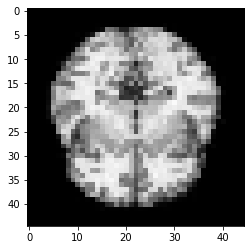

In [33]:
print(X_train[0].shape)
plt.imshow(X_train[0])
plt.show()

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD

# Import the backend
from keras import backend as K

# CNN (convolutional Neural Network) Model

In [35]:
model_cnn = Sequential()
# First convolutional layer, note the specification of shape
model_cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(45, 45, 3)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(4, activation='softmax'))

model_cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 43, 43, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3276928   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [36]:
model_cnn.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 4096 samples, validate on 1025 samples
Epoch 1/10
4096/4096 [==============================] - 1s 274us/step - loss: 1.2355 - accuracy: 0.4507 - val_loss: 1.0135 - val_accuracy: 0.5015
Epoch 2/10
4096/4096 [==============================] - 1s 190us/step - loss: 1.0328 - accuracy: 0.4922 - val_loss: 0.9811 - val_accuracy: 0.5132
Epoch 3/10
4096/4096 [==============================] - 1s 189us/step - loss: 1.0127 - accuracy: 0.5078 - val_loss: 0.9538 - val_accuracy: 0.5463
Epoch 4/10
4096/4096 [==============================] - 1s 190us/step - loss: 0.9845 - accuracy: 0.5393 - val_loss: 1.0031 - val_accuracy: 0.5327
Epoch 5/10
4096/4096 [==============================] - 1s 188us/step - loss: 0.9450 - accuracy: 0.5581 - val_loss: 0.8911 - val_accuracy: 0.5610
Epoch 6/10
4096/4096 [==============================] - 1s 187us/step - loss: 0.8998 - accuracy: 0.5757 - val_loss: 0.8706 - val_accuracy: 0.5688
Epoch 7/10
4096/4096 [==============================] - 1s 190us/step - loss

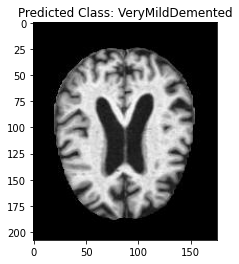

In [37]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

sample_image_path = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg'

img = image.load_img(sample_image_path, target_size=(45, 45))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the pixel values

predictions = model_cnn.predict(img_array)

predicted_class = np.argmax(predictions)
id_to_label_dict = {0: 'MildDemented', 1: 'ModerateDemented', 2: 'NonDemented', 3: 'VeryMildDemented'}
predicted_label = id_to_label_dict[predicted_class]

img = cv2.imread(sample_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_label}')
plt.show()